In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')
df

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


In [3]:
df = df.drop(['Unnamed: 0'] , axis = 1)

In [4]:
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   int64  
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   int64  
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average 

In [6]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [7]:
df['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64

In [8]:
bin_edges = range(0, int(df['Average visibility'].max()) + 20, 20)
binned_data = pd.cut(df['Average visibility'], bins=bin_edges)
value_counts = binned_data.value_counts().sort_index()
print(value_counts)

Average visibility
(0, 20]       1078
(20, 40]         0
(40, 60]        17
(60, 80]         0
(80, 100]        8
(100, 120]       1
(120, 140]       0
(140, 160]       0
(160, 180]       0
(180, 200]       0
(200, 220]       0
(220, 240]       0
(240, 260]       0
(260, 280]       0
(280, 300]       0
(300, 320]       0
(320, 340]       0
(340, 360]       0
(360, 380]       0
(380, 400]       0
(400, 420]       0
(420, 440]       0
(440, 460]       0
(460, 480]       0
(480, 500]       0
(500, 520]       1
Name: count, dtype: int64


In [9]:
df.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed',
       'Year', 'Month', 'Day'],
      dtype='object')

In [10]:
correlation = df[df.columns].corr()
correlation

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
Average Outflow,1.000000,0.541923,0.167099,0.040590,-0.115811,-0.022723,-0.061951,-0.000163,0.006070,0.035516,-0.068941,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.308915,-0.012221,-0.061292
Average Inflow,0.541923,1.000000,0.136211,-0.032709,-0.121364,0.018026,-0.035827,0.098149,0.093073,0.140905,-0.012452,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,0.388505,-0.066273,-0.055009
Energy Consumption,0.167099,0.136211,1.000000,-0.133076,-0.136945,0.000346,-0.167448,-0.266053,-0.245119,-0.222896,-0.004160,0.155245,-0.014242,0.007085,0.020656,0.017388,0.179876,0.272076,0.023010
Ammonia,0.040590,-0.032709,-0.133076,1.000000,0.164753,0.284552,0.342995,0.110000,0.099279,0.094802,-0.032908,-0.076970,-0.074313,-0.028647,-0.047966,-0.048622,0.140567,-0.112396,-0.029223
Biological Oxygen Demand,-0.115811,-0.121364,-0.136945,0.164753,1.000000,0.524189,0.455843,0.150706,0.137368,0.133025,-0.011270,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.228753,-0.065866,-0.000713
Chemical Oxygen Demand,-0.022723,0.018026,0.000346,0.284552,0.524189,1.000000,0.681225,0.083946,0.090018,0.052716,0.002585,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.231927,-0.034368,0.005837
Total Nitrogen,-0.061951,-0.035827,-0.167448,0.342995,0.455843,0.681225,1.000000,0.269751,0.259386,0.232274,0.006595,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,0.120105,-0.142140,-0.007392
Average Temperature,-0.000163,0.098149,-0.266053,0.110000,0.150706,0.083946,0.269751,1.000000,0.924944,0.890901,0.013499,-0.553688,-0.004256,-0.122247,0.098620,0.219791,0.015400,-0.272413,-0.009542
Maximum temperature,0.006070,0.093073,-0.245119,0.099279,0.137368,0.090018,0.259386,0.924944,1.000000,0.759461,0.018942,-0.533249,-0.003110,-0.120905,0.035349,0.199370,-0.004957,-0.223353,0.006459
Minimum temperature,0.035516,0.140905,-0.222896,0.094802,0.133025,0.052716,0.232274,0.890901,0.759461,1.000000,0.004990,-0.386078,0.030974,-0.090034,0.123755,0.181562,0.100206,-0.285621,-0.024275


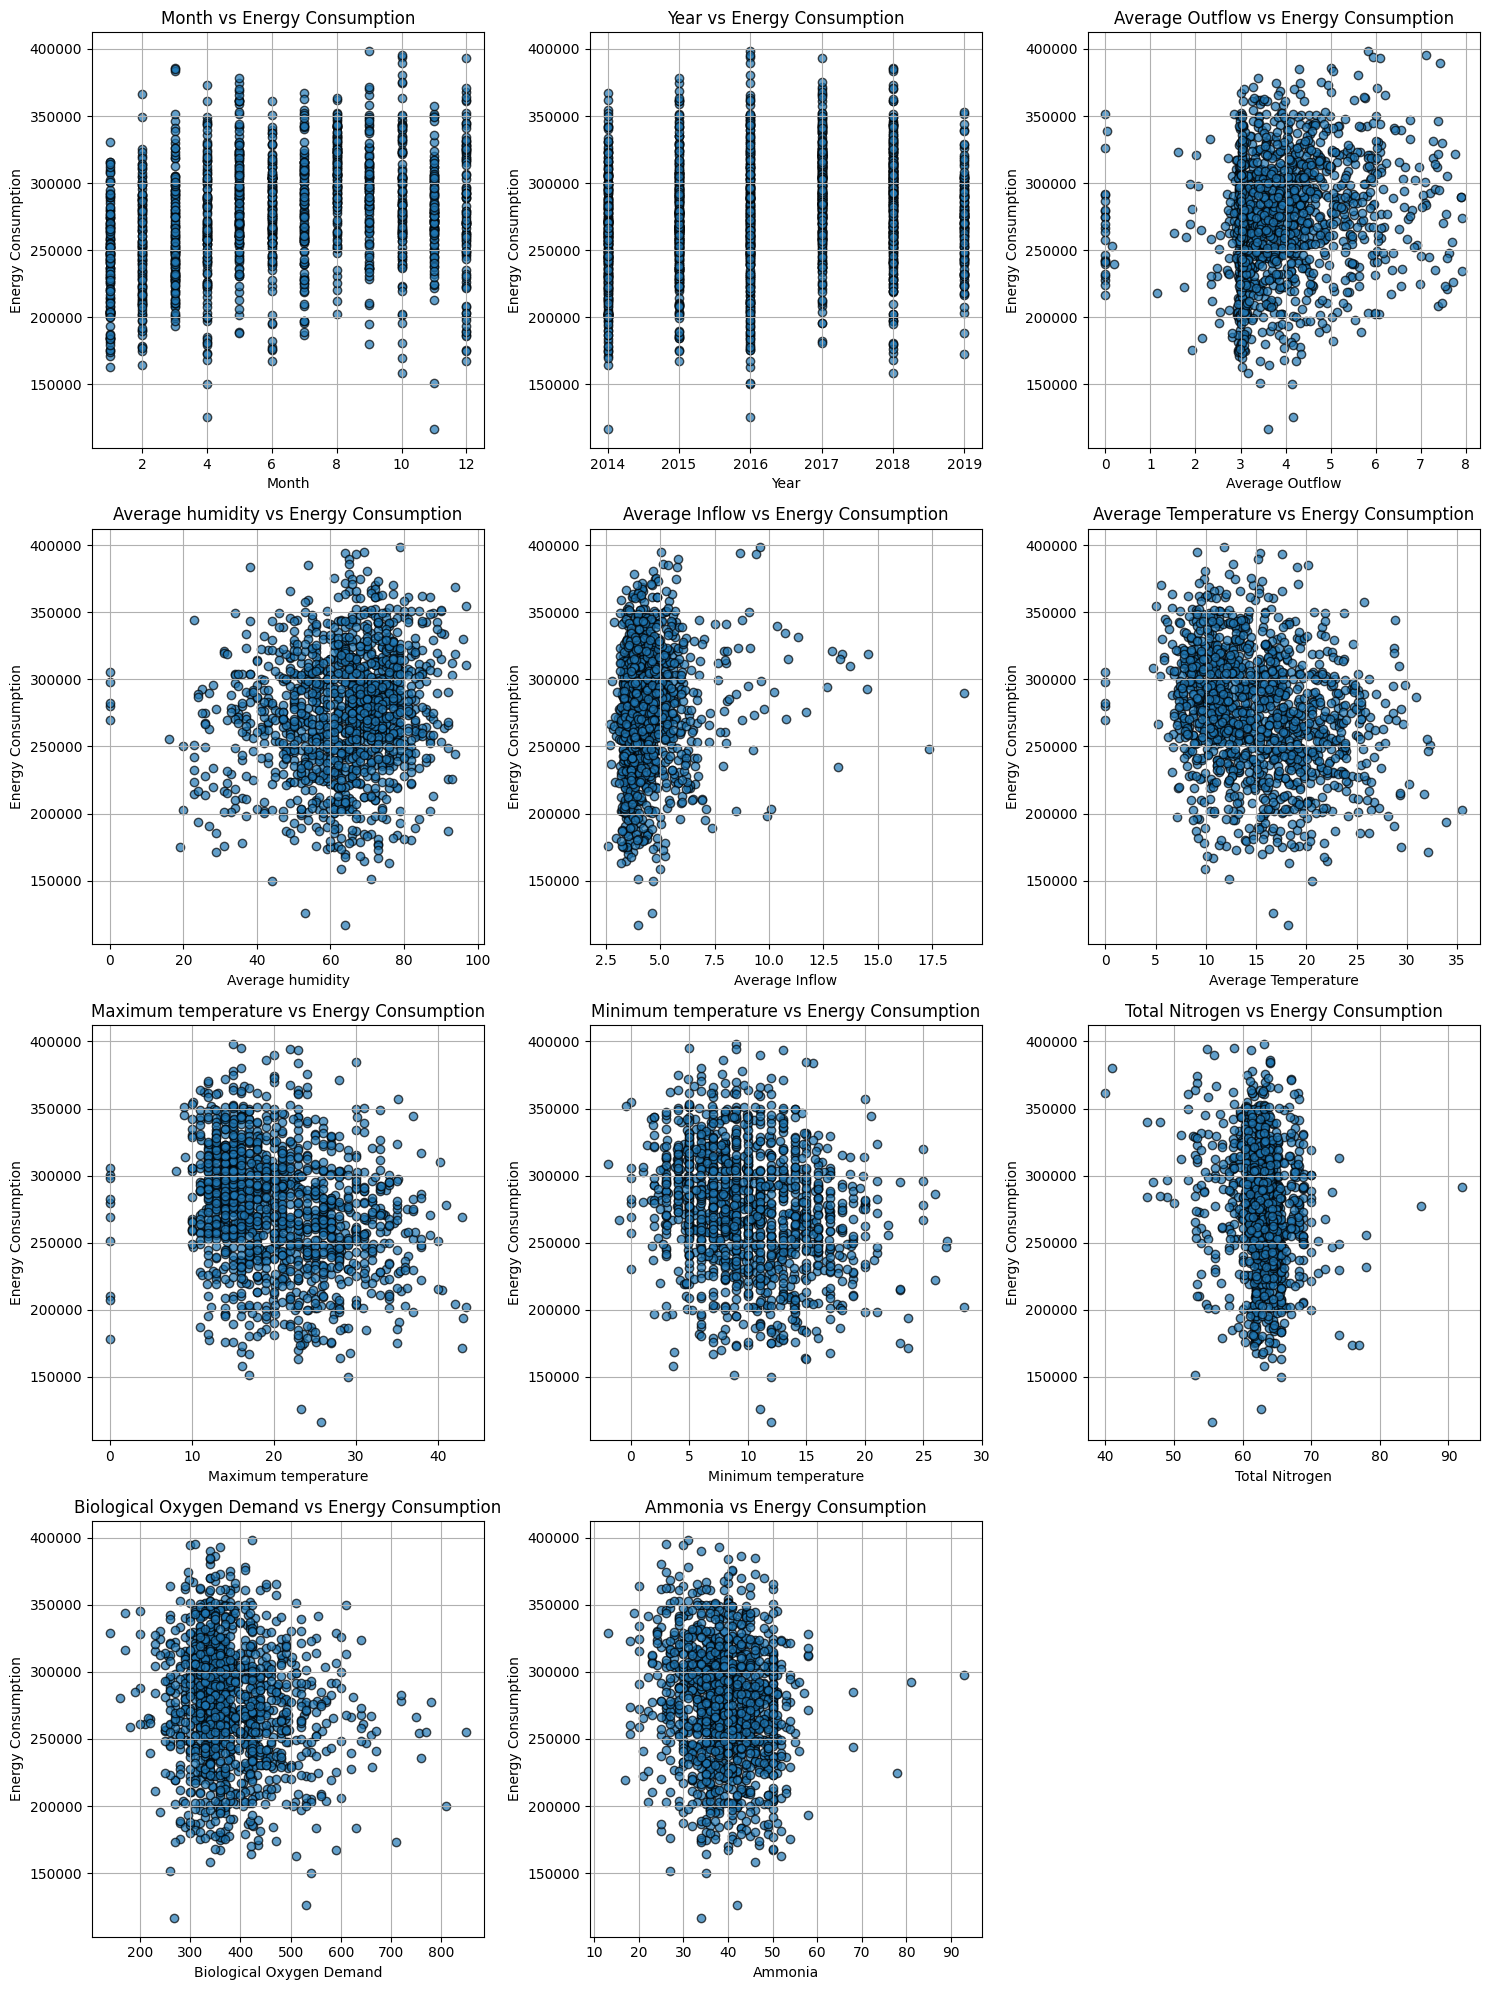

In [11]:
target = "Energy Consumption"
features = ["Month", "Year", "Average Outflow", "Average humidity", 
    "Average Inflow", "Average Temperature", "Maximum temperature", 
    "Minimum temperature", "Total Nitrogen", "Biological Oxygen Demand", "Ammonia"
]
plots_per_row = 3
n_rows = -(-len(features) // plots_per_row)
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15, n_rows * 5))
axes = axes.flatten() 
for i, column in enumerate(features):
    ax = axes[i]
    ax.scatter(df[column], df[target], alpha=0.7, edgecolors="k")
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)
    ax.grid(True)
for j in range(len(features), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

logistic regression from scratch

In [12]:
def sigmoidfun(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights, bias):
    m = len(y) 
    predictions = sigmoidfun(np.dot(X, weights) + bias)  
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [13]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = [] 
    for i in range(iterations):
        
        predictions = sigmoidfun(np.dot(X, weights) + bias)
        
        
        dw = (1/m) * np.dot(X.T, (predictions - y))  
        db = (1/m) * np.sum(predictions - y)  
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        cost_history.append(compute_cost(X, y, weights, bias))
    
    return weights, bias, cost_history

In [14]:
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape  
    weights = np.zeros(n)  
    bias = 0  
    
    
    weights, bias, cost_history = gradient_descent(X, y, weights, bias, learning_rate, iterations)
    
    return weights, bias, cost_history


def predict(X, weights, bias):
    predictions = sigmoidfun(np.dot(X, weights) + bias)
    return [1 if i > 0.5 else 0 for i in predictions]  


In [15]:
target = "Energy Consumption"  
features = ["Year", "Month", "Average humidity", "Average Outflow", "Average Temperature", 
            "Total Nitrogen", "Biological Oxygen Demand", "Ammonia"]


df['Operational_State'] = (df[target] > df[target].mean()).astype(int)


X = df[features].values
y = df['Operational_State'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


weights, bias, cost_history = logistic_regression(X_train, y_train, learning_rate=0.01, iterations=1000)

y_pred = predict(X_test, weights, bias)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       133
           1       0.70      0.69      0.69       144

    accuracy                           0.68       277
   macro avg       0.68      0.68      0.68       277
weighted avg       0.68      0.68      0.68       277


Confusion Matrix:
 [[90 43]
 [45 99]]


via sklearn

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       133
           1       0.70      0.69      0.69       144

    accuracy                           0.69       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.69      0.69      0.69       277


Confusion Matrix:
 [[91 42]
 [45 99]]


KNN algo

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_auto = KNeighborsRegressor()
knn_auto.fit(X_train_scaled, y_train)

y_pred_deflt = knn_auto.predict(X_test_scaled)
y_pred_class_default = np.round(y_pred_deflt)  

mse_default = mean_squared_error(y_test, y_pred_deflt)
rmse_default = mse_default**0.5
r2_default = r2_score(y_test, y_pred_deflt)
accuracy_default = accuracy_score(y_test, y_pred_class_default)

print("before tuning")
print(f"MSE (): {mse_default}")
print(f"RMSE (): {rmse_default}")
print(f"R2 Score (): {r2_default}")
print(f"Accuracy (): {accuracy_default}")
print("Classification Report ():")
print(classification_report(y_test, y_pred_class_default))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
knn_temp = grid_search.best_estimator_
y_pred_regresn = knn_temp.predict(X_test_scaled)
y_pred_class = np.round(y_pred_regresn) 

mse = mean_squared_error(y_test, y_pred_regresn)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_regresn)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

before tuning
MSE (): 0.2193501805054152
RMSE (): 0.4683483537981266
R2 Score (): 0.12121345029239783
Accuracy (): 0.6750902527075813
Classification Report ():
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       133
           1       0.69      0.69      0.69       144

    accuracy                           0.68       277
   macro avg       0.67      0.67      0.67       277
weighted avg       0.68      0.68      0.68       277

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Mean Squared Error: 0.19209909343783255
Root Mean Squared Error: 0.4382911058164796
R2 Score: 0.23038996760696273
Accuracy: 0.7148014440433214
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.72      0.73      0.73       144

    accuracy                           0.71       277
   macro avg       0.71      0.71      0

Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

X_train_ = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_auto = DecisionTreeClassifier(random_state=42)
dt_auto.fit(X_train_, y_train)

y_pred_default = dt_auto.predict(X_test_scaled)

accuracy_default = accuracy_score(y_test, y_pred_default)

print("before hyperparameter tuning")
print(f"Accuracy (Default): {accuracy_default:.2f}")
print("Classification Report (Default):")
print(classification_report(y_test, y_pred_default))

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_auto, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"\nBest parameters found by GridSearchCV: {best_params}")

dt_best = grid_search.best_estimator_
y_pred_best = dt_best.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("\n=== Performance after hyperparameter tuning ===")
print(f"Accuracy (Tuned): {accuracy_best:.2f}")
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_best))


before hyperparameter tuning
Accuracy (Default): 0.62
Classification Report (Default):
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       133
           1       0.66      0.58      0.62       144

    accuracy                           0.62       277
   macro avg       0.63      0.63      0.62       277
weighted avg       0.63      0.62      0.62       277


Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

=== Performance after hyperparameter tuning ===
Accuracy (Tuned): 0.64
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       133
           1       0.67      0.61      0.64       144

    accuracy                           0.64       277
   macro avg       0.64      0.64      0.64       277
weighted avg       0.64      0.64      0.64       277



In [20]:
dt_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced', **best_params)
dt_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = dt_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Accuracy: {accuracy_weighted:.2f}")
print("Classification Report (Weighted):")
print(classification_report(y_test, y_pred_weighted))


Weighted Accuracy: 0.65
Classification Report (Weighted):
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       133
           1       0.67      0.64      0.65       144

    accuracy                           0.65       277
   macro avg       0.65      0.65      0.65       277
weighted avg       0.65      0.65      0.65       277



Random forest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

rf_default = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_default.fit(X_train_scaled, y_train)

y_pred_AUTO = rf_default.predict(X_test_scaled)

accuracy_rf_default = accuracy_score(y_test, y_pred_AUTO)
print(f"Random Forest Accuracy (Before tuning): {accuracy_rf_default:.2f}")
print("Classification Report (Before tuning):")
print(classification_report(y_test, y_pred_AUTO))

param_dist_rf = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2']
}


random_search_rf = RandomizedSearchCV(
    estimator=rf_default,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_scaled, y_train)

best_params_rf = random_search_rf.best_params_
print(f"\nBest parameters for Random Forest: {best_params_rf}")

rf_best = random_search_rf.best_estimator_

y_pred_rf_best = rf_best.predict(X_test_scaled)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Classification Report (After tuning):")
print(classification_report(y_test, y_pred_rf_best))



Random Forest Accuracy (Before tuning): 0.70
Classification Report (Before tuning):
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       133
           1       0.74      0.67      0.70       144

    accuracy                           0.70       277
   macro avg       0.71      0.71      0.70       277
weighted avg       0.71      0.70      0.70       277


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Classification Report (After tuning):
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       133
           1       0.75      0.67      0.71       144

    accuracy                           0.71       277
   macro avg       0.72      0.72      0.71       277
weighted avg       0.72      0.71      0.71       277



SVM

In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train_ = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC(random_state=42)

svm_default = SVC(random_state=42)
svm_default.fit(X_train_, y_train)

y_pred_default = svm_default.predict(X_test_scaled)

accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy (Before training with default parameters): {accuracy_default:.2f}")
print("Classification Report (Before training with default parameters):")
print(classification_report(y_test, y_pred_default))

param_dist = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3, 
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_, y_train)

best_params = random_search.best_params_
print(f"\nBest parameters for SVM: {best_params}")

svm_best = random_search.best_estimator_

y_pred_best = svm_best.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (After RandomizedSearchCV): {accuracy_best:.2f}")
print("Classification Report (After RandomizedSearchCV):")
print(classification_report(y_test, y_pred_best))


Accuracy (Before training with default parameters): 0.70
Classification Report (Before training with default parameters):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       133
           1       0.71      0.73      0.72       144

    accuracy                           0.70       277
   macro avg       0.70      0.70      0.70       277
weighted avg       0.70      0.70      0.70       277


Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 1}
Accuracy (After RandomizedSearchCV): 0.70
Classification Report (After RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       133
           1       0.71      0.73      0.72       144

    accuracy                           0.70       277
   macro avg       0.70      0.70      0.70       277
weighted avg       0.70      0.70      0.70       277



best model as per my feature extraction is KNN model with
MSE (Tuned): 0.19209909343783255
RMSE (Tuned): 0.4382911058164796
R2 Score (Tuned): 0.23038996760696273
Accuracy (Tuned): 0.7148014440433214
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.72      0.73      0.73       144

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277

